### Providing Insights for Crisis Recovery in an Online Food Delivery Startup
##### Churn flag and Clustering

In [1]:
## importing libraries
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
## Load data

customers = pd.read_csv("C:\\Users\\Swapnil\\Downloads\\crisis_recovery_online_food_startup\\RPC_18_Datasets\\dim_customer.csv")
orders = pd.read_csv("C:\\Users\\Swapnil\\Downloads\\crisis_recovery_online_food_startup\\RPC_18_Datasets\\fact_orders.csv")

In [3]:
customers.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [4]:
orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N


In [5]:
## Aggregate order data to get total orders and total amount spent by each customer
order_summary = orders.groupby('customer_id').agg({
    'order_id': 'count',
    'order_timestamp': 'max'
}).reset_index().rename(columns = {'order_id':'total_orders', 'order_timestamp': 'last_order_date'})
order_summary.head()

,customer_id,total_orders,last_order_date
0,CUST000007,1,2025-05-11 12:39:00
1,CUST000008,1,2025-02-17 21:30:00
2,CUST000009,4,2025-08-08 20:47:00
3,CUST000010,3,2025-05-24 12:43:00
4,CUST000011,1,2025-02-09 22:41:00


In [6]:
## Merge with customer info
customer_df = customers.merge(order_summary, on = 'customer_id', how = 'left')
customer_df['total_orders'] = customer_df['total_orders'].fillna(0)
customer_df.head()

,customer_id,signup_date,city,acquisition_channel,total_orders,last_order_date
0,CUST000007,21-03-2025,Pune,Organic,1.0,2025-05-11 12:39:00
1,CUST000008,07-02-2025,Kolkata,Referral,1.0,2025-02-17 21:30:00
2,CUST000009,25-02-2025,Delhi,Paid,4.0,2025-08-08 20:47:00
3,CUST000010,28-01-2025,Hyderabad,Paid,3.0,2025-05-24 12:43:00
4,CUST000011,18-01-2025,Kolkata,Organic,1.0,2025-02-09 22:41:00


In [8]:
## Flag churned customers(no orders after july 2025)
customer_df['churn_flag'] = pd.to_datetime(customer_df['last_order_date']) < pd.to_datetime('2025-07-01')
customer_df

,customer_id,signup_date,city,acquisition_channel,total_orders,last_order_date,churn_flag
0,CUST000007,21-03-2025,Pune,Organic,1.0,2025-05-11 12:39:00,True
1,CUST000008,07-02-2025,Kolkata,Referral,1.0,2025-02-17 21:30:00,True
2,CUST000009,25-02-2025,Delhi,Paid,4.0,2025-08-08 20:47:00,False
3,CUST000010,28-01-2025,Hyderabad,Paid,3.0,2025-05-24 12:43:00,True
4,CUST000011,18-01-2025,Kolkata,Organic,1.0,2025-02-09 22:41:00,True
...,...,...,...,...,...,...,...
107771,CUST199995,19-11-2024,Delhi,Organic,1.0,2025-01-08 21:26:00,True
107772,CUST199996,14-01-2025,Hyderabad,Social,1.0,2025-01-28 20:49:00,True
107773,CUST199997,22-12-2024,Hyderabad,Organic,1.0,2025-01-04 22:49:00,True
107774,CUST199999,11-05-2025,Mumbai,Organic,1.0,2025-05-13 19:01:00,True


In [9]:
## Segment customers using KMeans
X = customer_df[['total_orders']]
Kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
customer_df['cluster'] = Kmeans.labels_

In [10]:
customer_df

,customer_id,signup_date,city,acquisition_channel,total_orders,last_order_date,churn_flag,cluster
0,CUST000007,21-03-2025,Pune,Organic,1.0,2025-05-11 12:39:00,True,0
1,CUST000008,07-02-2025,Kolkata,Referral,1.0,2025-02-17 21:30:00,True,0
2,CUST000009,25-02-2025,Delhi,Paid,4.0,2025-08-08 20:47:00,False,2
3,CUST000010,28-01-2025,Hyderabad,Paid,3.0,2025-05-24 12:43:00,True,2
4,CUST000011,18-01-2025,Kolkata,Organic,1.0,2025-02-09 22:41:00,True,0
...,...,...,...,...,...,...,...,...
107771,CUST199995,19-11-2024,Delhi,Organic,1.0,2025-01-08 21:26:00,True,0
107772,CUST199996,14-01-2025,Hyderabad,Social,1.0,2025-01-28 20:49:00,True,0
107773,CUST199997,22-12-2024,Hyderabad,Organic,1.0,2025-01-04 22:49:00,True,0
107774,CUST199999,11-05-2025,Mumbai,Organic,1.0,2025-05-13 19:01:00,True,0


- Aggregates order history per customer.
- Flags customers as churned if they haven’t ordered since July 2025.
- Uses K-Means clustering to group customers by order volume (e.g., low, medium, high engagement).


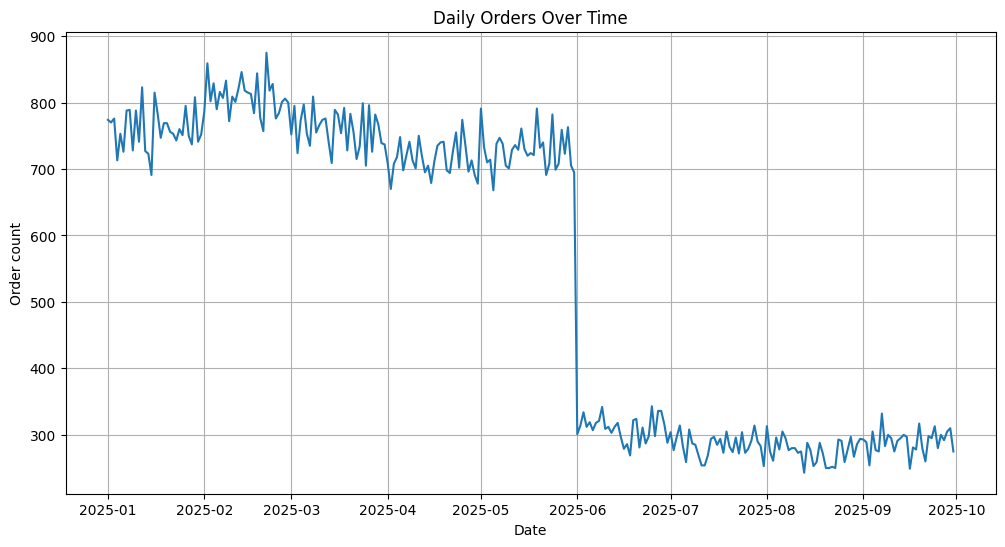

In [11]:
## Time Series plotting
import matplotlib.pyplot as plt

orders['order_date'] = pd.to_datetime(orders['order_timestamp']).dt.date
daily_orders = orders.groupby('order_date')['order_id'].count()

plt.figure(figsize=(12,6))
plt.plot(daily_orders.index, daily_orders.values)
plt.title('Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Order count')
plt.grid(True)
plt.show()

- Line chart shows how order volume changed over time

### Delay distribution

In [13]:
delivery = pd.read_csv("C:\\Users\\Swapnil\\Downloads\\crisis_recovery_online_food_startup\\RPC_18_Datasets\\fact_delivery_performance.csv")
delivery.head()

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4


In [ ]:
## Create new column for delay in minutes
delivery['delay_minutes'] = delivery['actual_delivery_time_mins'] - delivery['expected_delivery_time_mins']
delivery.head()

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km,delay_minutes
0,ORD202501023439,31,31,6.4,0
1,ORD202501012051,46,42,1.9,4
2,ORD202501019281,25,31,6.2,-6
3,ORD202501000124,29,41,6.2,-12
4,ORD202501006518,37,41,2.4,-4


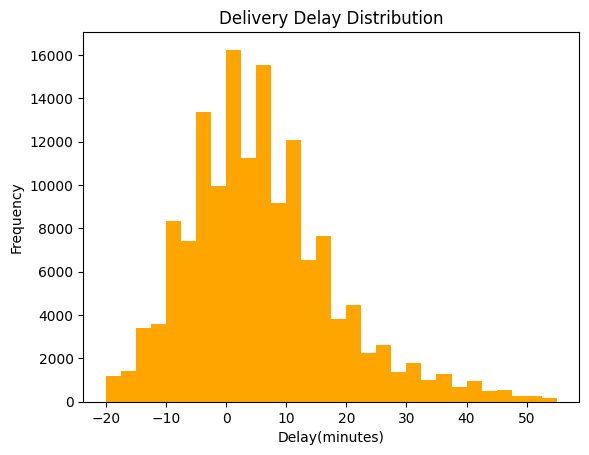

In [16]:
## histogram to show how delays are distributed
plt.hist(delivery['delay_minutes'], bins = 30, color = 'orange')
plt.title('Delivery Delay Distribution')
plt.xlabel('Delay(minutes)')
plt.ylabel('Frequency')
plt.show()

### Sentiment Trend

In [17]:
ratings = pd.read_csv("C:\\Users\\Swapnil\\Downloads\\crisis_recovery_online_food_startup\\RPC_18_Datasets\\fact_ratings.csv")
ratings.head()

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70


In [ ]:
## Converts review timestamps to dates and calculates daily average sentiment scores
ratings['review_date'] = pd.to_datetime(ratings['review_timestamp'], format="%d-%m-%Y %H:%M", dayfirst=True).dt.date
daily_sentiment = ratings.groupby('review_date')['sentiment_score'].mean()

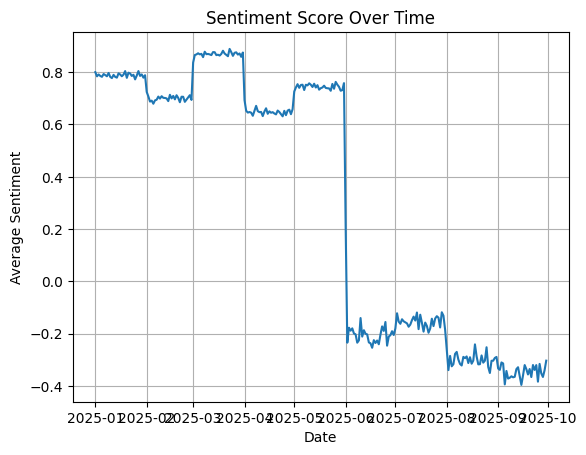

In [25]:
## - Plots a trend line to show how customer sentiment changed — especially during and after the crisis.
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

### ROI Calculation

- Filter orders between July 1 and August 31, 2025
- Join with customer data to get acquisition_channel
- Count unique customers (converted)
- Sum total revenue
- Group by acquisition channel


In [34]:
orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01


In [35]:
## filter orders for recovery phase (July 1 to August 31, 2025)
filtered_orders = orders[orders['order_timestamp'].between('2025-07-01', '2025-08-31')]

## merge with customer data to get acquisition channel
merged_data = filtered_orders.merge(customers[['customer_id', 'acquisition_channel']], on = 'customer_id', how = 'left')

## group by acquisition channel to calculate conversions and revenue
campaign_ROI = merged_data.groupby('acquisition_channel').agg(
    converted_customers = ('customer_id', lambda x: x.nunique()),
    revenue_generated = ('total_amount', 'sum')
).reset_index()

## Display ROI table
display(campaign_ROI)

,acquisition_channel,converted_customers,revenue_generated
0,Organic,6480,2173000.97
1,Paid,5163,1803607.34
2,Referral,1986,670433.94
3,Social,1810,628821.43


In [41]:
# Assume campaign_costs is a dictionary of spend per channel
campaign_costs = {
    'Social': 5000,
    'Organic': 2000,
    'Paid': 2000,
    'Referral': 3000
}

campaign_ROI['roi'] = campaign_ROI['revenue_generated']/ campaign_ROI['acquisition_channel'].map(campaign_costs)
campaign_ROI

,acquisition_channel,converted_customers,revenue_generated,roi,conversion_rate
0,Organic,6480,2173000.97,1086.500485,41.971630
1,Paid,5163,1803607.34,901.803670,33.441285
2,Referral,1986,670433.94,223.477980,12.863527
3,Social,1810,628821.43,125.764286,11.723557


In [ ]:
campaign_ROI['average_rating'] = campaign_ROI['converted_customers']*100.0 / campaign_ROI['converted_customers'].sum()
campaign_ROI

,acquisition_channel,converted_customers,revenue_generated,roi,average_rating
0,Organic,6480,2173000.97,1086.500485,41.971630
1,Paid,5163,1803607.34,901.803670,33.441285
2,Referral,1986,670433.94,223.477980,12.863527
3,Social,1810,628821.43,125.764286,11.723557


Text(0, 0.5, 'Average Rating')

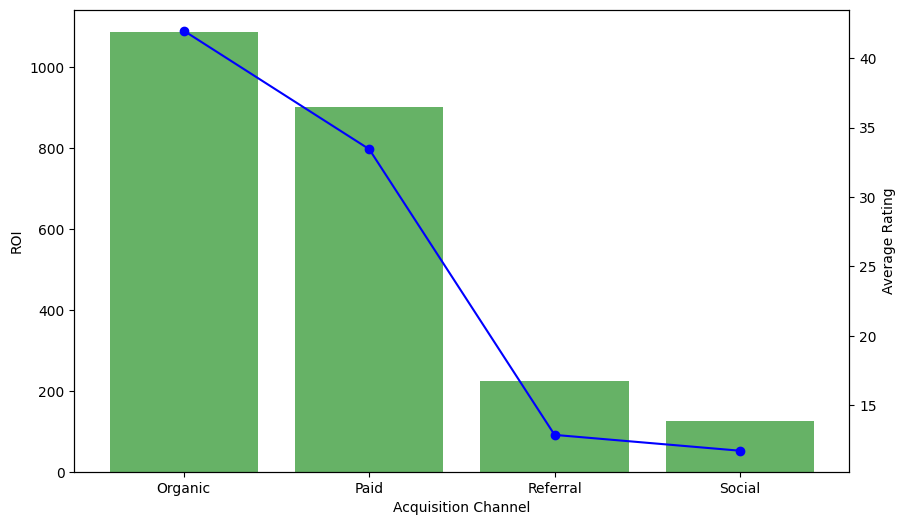

In [50]:
##  bar charts for ROI and conversion rate per channel. Highlight top-performing segments.
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
channels = campaign_ROI['acquisition_channel']
ax1.bar(channels, campaign_ROI['roi'], color='g', alpha=0.6, label='ROI')
ax2.plot(channels, campaign_ROI['average_rating'], color='b', marker='o', label='Average Rating')
ax1.set_xlabel('Acquisition Channel')
ax1.set_ylabel('ROI')
ax2.set_ylabel('Average Rating')


###  Partner Retention Flag


In [69]:
#### - Combines order volume, revenue, and customer ratings.Helps rank restaurants by business impact.

last_order = orders.groupby('restaurant_id')['order_timestamp'].max().reset_index()
last_order['active_post_crisis'] = pd.to_datetime(last_order['order_timestamp']) > pd.to_datetime('2025-07-01')
restaurant_orders = restaurant_orders.merge(last_order[['restaurant_id', 'active_post_crisis']], on='restaurant_id', how='left')
restaurant_orders

MergeError: Passing 'suffixes' which cause duplicate columns {'active_post_crisis_x'} is not allowed.

In [ ]:

##- Filters the restaurant_orders DataFrame to only include restaurants that were active after the crisis (i.e., placed orders after July 2025).
active = restaurant_order[restaurant_order['active_post_crisis']]

## Aggregates the number of orders per restaurant.
total_orders = orders.groupby('restaurant_id')['order_id'].count().reset_index().rename(columns={'order_id':'total_orders'})

## Calculates the average sentiment score per restaurant.
average_ratings = ratings.groupby('restaurant_id')['sentiment_score'].mean().reset_index().rename(columns={'sentiment_score':'average_rating'})

## Merges the total_orders and average_ratings data into the restaurant_orders DataFrame
restaurant_order = restaurant_order.merge(total_orders, on='restaurant_id', how='left')
restaurant_orde = restaurant_order.merge(average_ratings, on='restaurant_id', how='left')

restaurant_order

MergeError: Passing 'suffixes' which cause duplicate columns {'total_orders_x'} is not allowed.

In [ ]:
## scatter plot of avg_rating vs. total_orders with color-coded active_post_crisis flag
##- Sets the size of the plot to 10 inches wide by 6 inches tall
plt.figure(figsize=(10,6))

plt.scatter(active['average_ratings'], active['total_orders'], color='g', label='Active Post-Crisis')
plt.scatter(restaurant_orders[~restaurant_orders['active_post_crisis']]['average_ratings'], 
            restaurant_orders[~restaurant_orders['active_post_crisis']]['total_orders'], color='r', label='Churned Post-Crisis')
plt.title('Restaurant Performance: Avg Rating vs Total Orders')
plt.xlabel('Average Customer Rating')
plt.ylabel('Total Orders')
plt.legend()
plt.grid(True)
plt.show()